In [1]:
import pandas as pd

# Load the housing dataset
housing = pd.read_csv(r'C:\Users\Abdul\Pictures\handson-ml2-master\handson-ml2-master\datasets\housing\housing.csv')


print(f"Dataset shape: {housing.shape}")
housing.head()

Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Get basic information about the dataset
print("=== Dataset Info ===")
housing.info()

print("\n=== Dataset Description ===")
housing.describe()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

=== Dataset Description ===


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


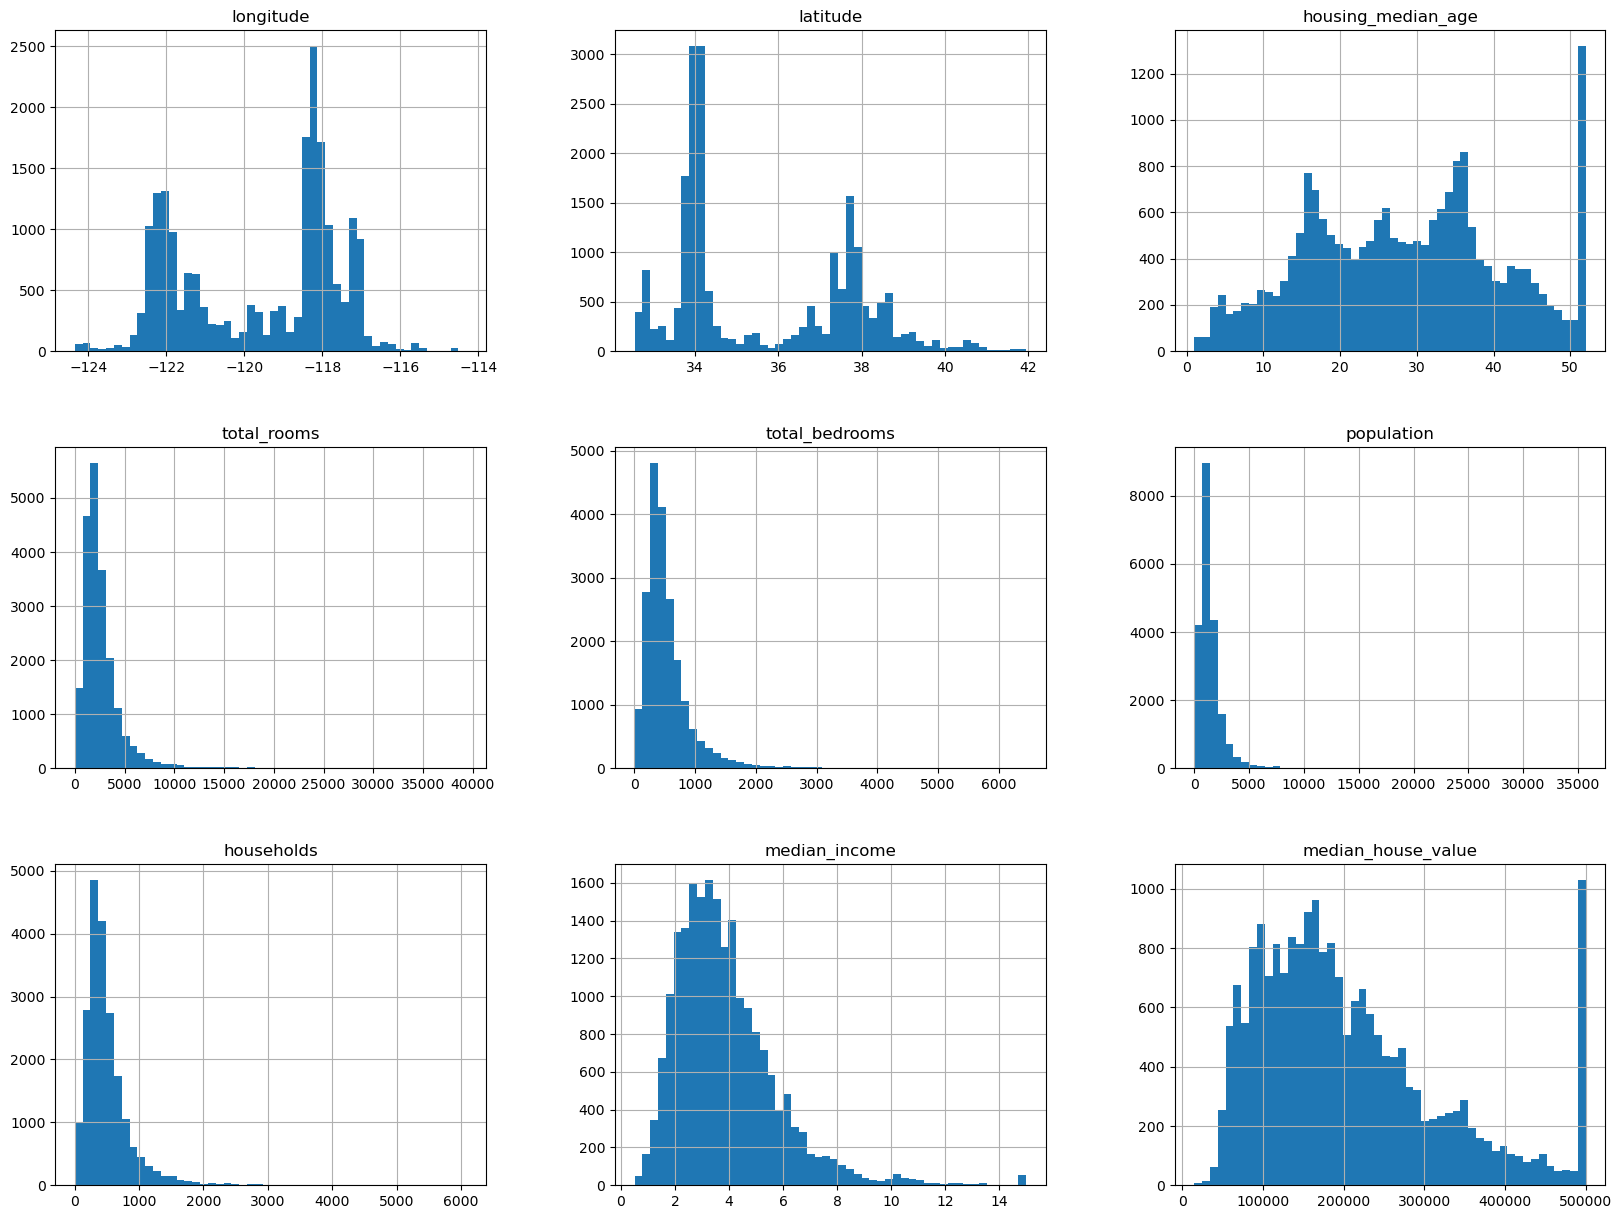

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Example usage with the housing dataset
train_set, test_set = split_train_test(housing, 0.2)
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")
print(f"Total: {len(train_set) + len(test_set)}")
print(f"Original dataset size: {len(housing)}")

Training set size: 16512
Test set size: 4128
Total: 20640
Original dataset size: 20640


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

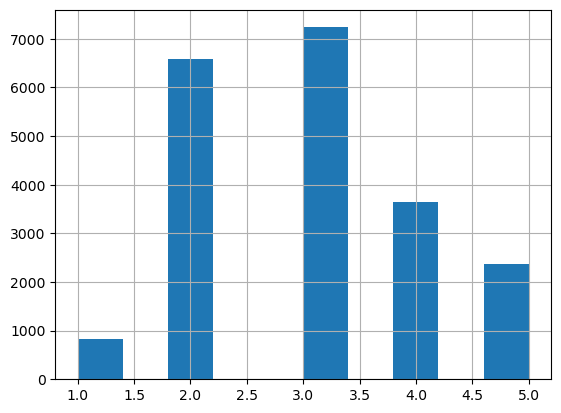

In [7]:
housing["income_cat"].hist()

plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [10]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [11]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    

In [13]:
housing = strat_train_set.copy()


<Figure size 1000x600 with 0 Axes>

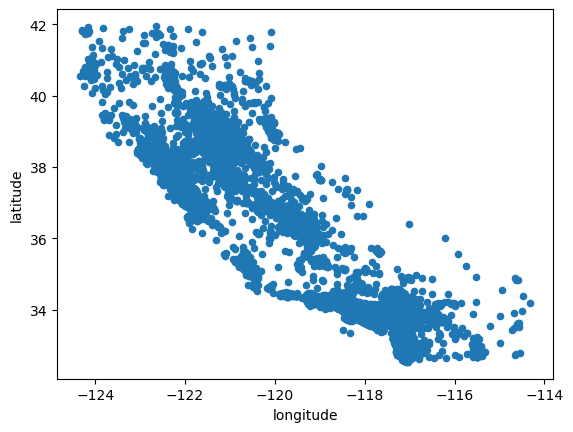

In [14]:
plt.figure(figsize=(10, 6))
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

<Figure size 1000x600 with 0 Axes>

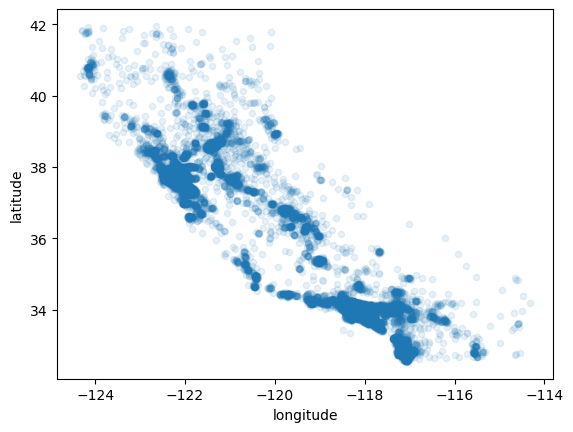

In [15]:
plt.figure(figsize=(10, 6))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

<Figure size 1000x600 with 0 Axes>

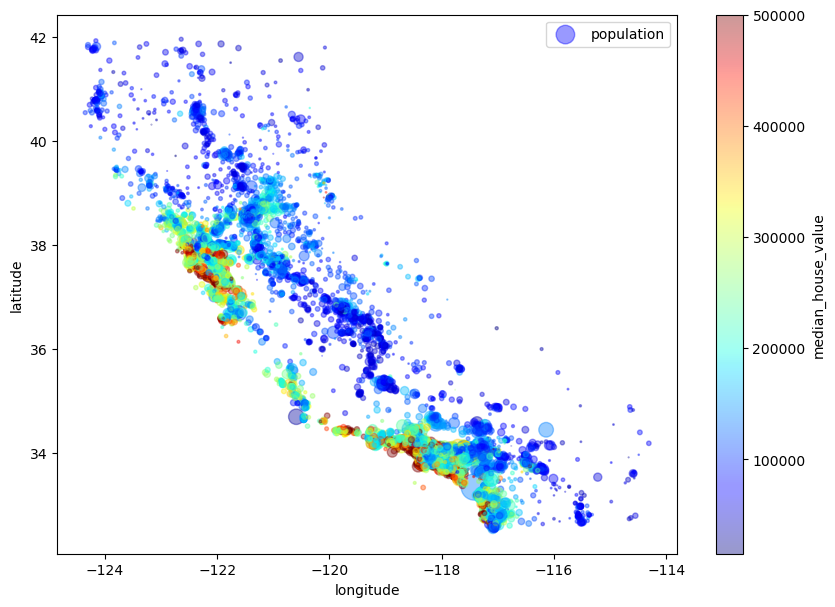

In [16]:
plt.figure(figsize=(10, 6))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

In [17]:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

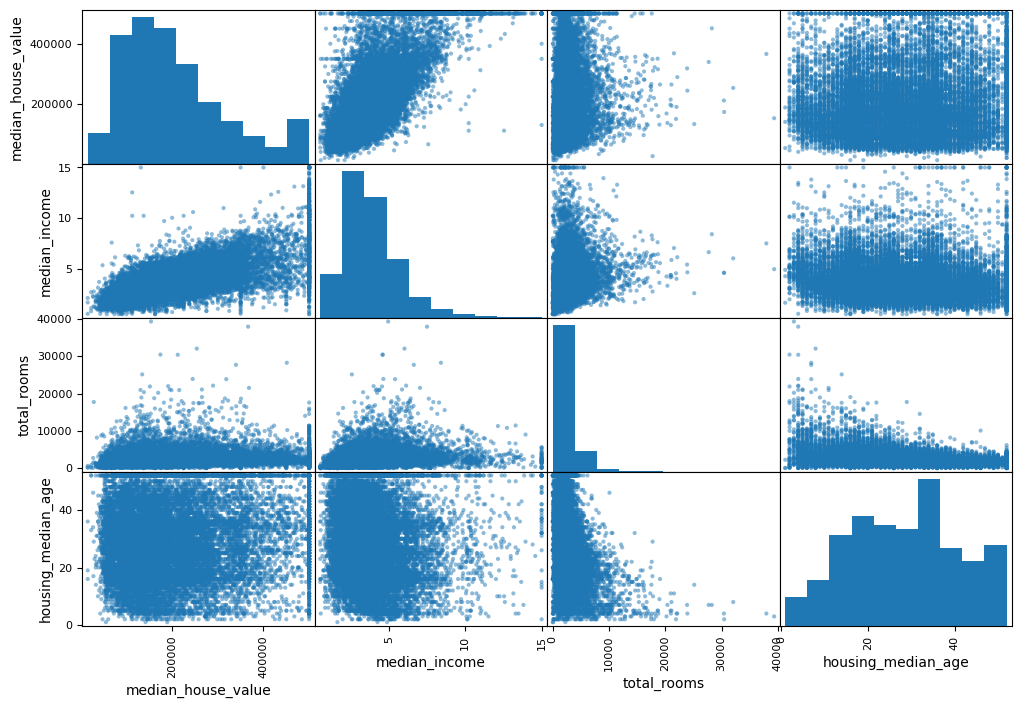

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


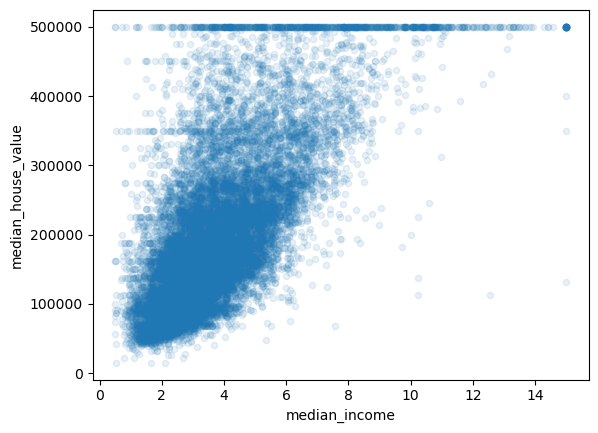

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)
plt.show()

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [21]:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Lab 2


In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\Abdul\AppData\Local\Temp\ipykernel_3756\2198282036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [27]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
X = imputer.transform(housing_num)


In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [31]:
housing_cat = housing[["ocean_proximity"]]

housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
ordinal_encoder = OrdinalEncoder()


In [34]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [35]:
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [39]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
     self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
     return self # nothing else to do
 def transform(self, X, y=None):
     rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
     population_per_household = X[:, population_ix] / X[:, households_ix]
     if self.add_bedrooms_per_room:
         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
         return np.c_[X, rooms_per_household, population_per_household,
             bedrooms_per_room]
     else:
         return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)


In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
some_data_prepared = full_pipeline.transform(some_data)

In [46]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [47]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [53]:
display_scores(tree_rmse_scores)

Scores: [73326.2512851  72114.66315732 69380.74446245 71479.51073333
 70227.29205689 77661.94606161 71803.51843583 73909.39789496
 68907.21754358 70292.19679843]
Mean: 71910.27384295073
Standard deviation: 2453.353174871395


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180616


In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [56]:
# Calculate scores for the RandomForestRegressor model
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

# Convert the negative scores to positive RMSE scores
forest_rmse_scores = np.sqrt(-forest_scores)

# Now, display the scores using your function
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


# LAB 3


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## Randomized Search

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000201B27305C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000201B27318E0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [137]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [139]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [143]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

In [145]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
final_rmse

47873.26095812988

In [149]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

## A full pipeline with both preparation and prediction

In [152]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [154]:
my_model = full_pipeline_with_predictor

In [157]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np

# Define the hyperparameter grid to search
param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

# Create an SVR instance
svm_reg = SVR()

# Set up the GridSearchCV
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2)


grid_search.fit(housing_prepared, housing_labels)


best_params = grid_search.best_params_
best_score_mse = grid_search.best_score_
best_score_rmse = np.sqrt(-best_score_mse)

print("Best hyperparameters found:", best_params)
print("Best RMSE score:", best_score_rmse)

# Assignment 3 solutions

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import loguniform

# Use Ridge regression (adds L2 regularization)
ridge = Ridge()

# Grid search over a few fixed alpha values
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False]
}

grid_search = GridSearchCV(
    ridge, param_grid, cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True, n_jobs=-1
)
grid_search.fit(housing_prepared, housing_labels)


param_distributions = {
    "alpha": loguniform(1e-3, 1e3),
    "fit_intercept": [True, False]
}

rnd_search = RandomizedSearchCV(
    ridge, param_distributions=param_distributions,
    n_iter=20, cv=5,
    scoring="neg_mean_squared_error",
    random_state=42, return_train_score=True, n_jobs=-1
)
rnd_search.fit(housing_prepared, housing_labels)

print("Ridge Regression — Grid best params:", grid_search.best_params_)
print("Ridge Regression — Random best params:", rnd_search.best_params_)


Ridge Regression — Grid best params: {'alpha': 10, 'fit_intercept': True}
Ridge Regression — Random best params: {'alpha': 4.676478725076045, 'fit_intercept': True}


In [73]:
# Cell 3 — Decision Tree tuning
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

param_grid_tree = [
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    {'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10], 'max_features': ['sqrt', 'log2', None]}
]

grid_search_tree = GridSearchCV(
    tree_reg, param_grid_tree, cv=5,
    scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search_tree.fit(housing_prepared, housing_labels)

param_distributions_tree = {
    'max_depth': [None] + list(range(10, 50, 5)),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 15),
    'max_features': ['sqrt', 'log2', None]
}

rnd_search_tree = RandomizedSearchCV(
    tree_reg, param_distributions=param_distributions_tree,
    n_iter=50, cv=5, scoring='neg_mean_squared_error',
    random_state=42, return_train_score=True, n_jobs=-1)
rnd_search_tree.fit(housing_prepared, housing_labels)

print("Decision Tree — Grid best params:", grid_search_tree.best_params_)
print("Decision Tree — Random best params:", rnd_search_tree.best_params_)


Decision Tree — Grid best params: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10}
Decision Tree — Random best params: {'max_depth': 35, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 8}


In [75]:
# Cell 4 — Random Forest tuning
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

param_grid_forest = [
    {'n_estimators': [50, 100, 200], 'max_features': [4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [4, 6, 8]}
]

grid_search_forest = GridSearchCV(
    forest_reg, param_grid_forest, cv=5,
    scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search_forest.fit(housing_prepared, housing_labels)

param_distributions_forest = {
    'n_estimators': randint(50, 300),
    'max_features': randint(4, 12),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

rnd_search_forest = RandomizedSearchCV(
    forest_reg, param_distributions=param_distributions_forest,
    n_iter=50, cv=5, scoring='neg_mean_squared_error',
    random_state=42, return_train_score=True, n_jobs=-1)
rnd_search_forest.fit(housing_prepared, housing_labels)

print("Random Forest — Grid best params:", grid_search_forest.best_params_)
print("Random Forest — Random best params:", rnd_search_forest.best_params_)


Random Forest — Grid best params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
Random Forest — Random best params: {'bootstrap': False, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 162}


In [78]:
# SVR tuning — GridSearch (wide like your working cell) + RandomizedSearch (log-uniform sampling)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np

svm_reg = SVR()


param_grid_svm = [
    {'kernel': ['linear'],
     'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'],
     'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

grid_search_svm = GridSearchCV(
    svm_reg, param_grid_svm, cv=5,
    scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True
)
grid_search_svm.fit(housing_prepared, housing_labels)


param_distributions_svm = {
    'kernel': ['linear', 'rbf'],
    'C': loguniform(1e1, 3e4),        # roughly covers [10, 30000]
    'gamma': loguniform(1e-3, 1e1)    # roughly covers [0.001, 10]
}

rnd_search_svm = RandomizedSearchCV(
    svm_reg,
    param_distributions=param_distributions_svm,
    n_iter=50, cv=5,
    scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1, return_train_score=True, verbose=2
)
rnd_search_svm.fit(housing_prepared, housing_labels)

# Print concise best results only (like the other models)
best_grid_params = grid_search_svm.best_params_
best_grid_rmse = np.sqrt(-grid_search_svm.best_score_)

best_rand_params = rnd_search_svm.best_params_
best_rand_rmse = np.sqrt(-rnd_search_svm.best_score_)

print("SVR — Grid best params:", best_grid_params)
print(f"SVR — Grid best CV RMSE: {best_grid_rmse:.3f}")
print("SVR — Random best params:", best_rand_params)
print(f"SVR — Random best CV RMSE: {best_rand_rmse:.3f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
SVR — Grid best params: {'C': 30000.0, 'kernel': 'linear'}
SVR — Grid best CV RMSE: 70286.618
SVR — Random best params: {'C': 16628.78326769576, 'gamma': 0.4020759548749851, 'kernel': 'rbf'}
SVR — Random best CV RMSE: 60378.458


,Model,Search Type,Best CV RMSE,Best Params,Best Score (neg MSE)
5,Random Forest,Random,48596.18,"{'bootstrap': False, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 162}",-2361589190.415715
4,Random Forest,Grid,48672.09,"{'bootstrap': False, 'max_features': 6, 'n_estimators': 100}",-2368972713.404746
3,Decision Tree,Random,59048.66,"{'max_depth': 35, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 8}",-3486744469.782567
2,Decision Tree,Grid,60069.74,"{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10}",-3608373859.509959
7,SVR,Random,60378.46,"{'C': 16628.78326769576, 'gamma': 0.4020759548749851, 'kernel': 'rbf'}",-3645558189.029029
0,Linear Regression,Grid,69077.32,{'fit_intercept': True},-4771676206.132607
1,Linear Regression,Random,69077.32,{'fit_intercept': True},-4771676206.132607
6,SVR,Grid,70286.62,"{'C': 30000.0, 'kernel': 'linear'}",-4940208721.230187


Saving figure: .\images\comparison_grid_vs_random.png


<Figure size 1100x600 with 0 Axes>

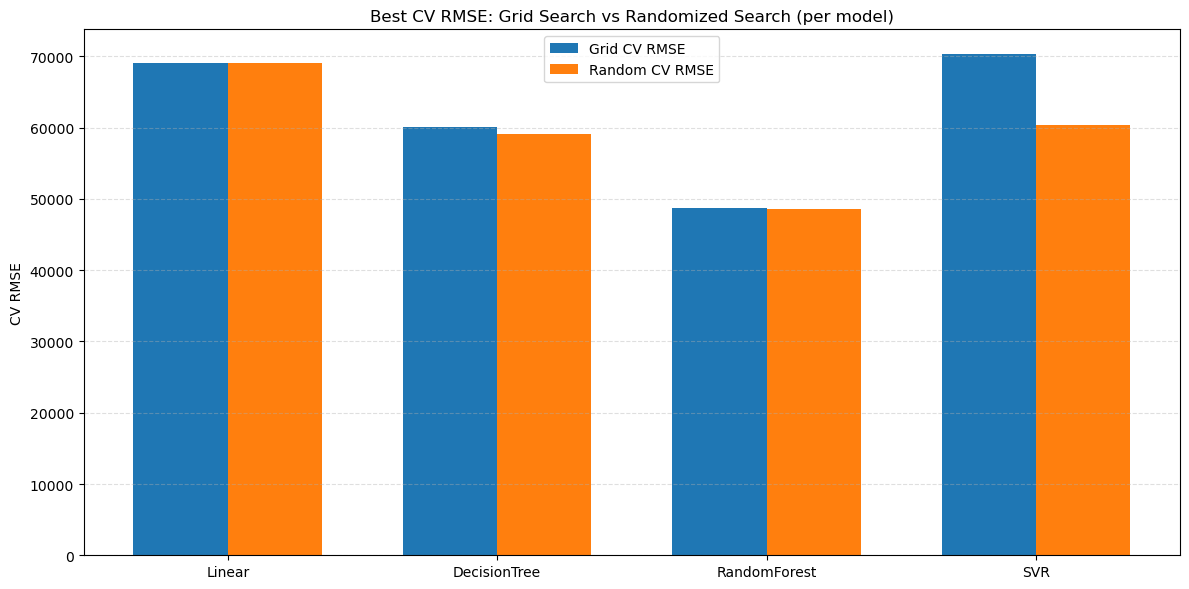

In [104]:
# Cell A — Comparison table + overall summary bar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build comparison DataFrame using the Grid & Random searches you ran earlier
comparison_data = {
    'Model': [
        'Linear Regression', 'Linear Regression',
        'Decision Tree', 'Decision Tree',
        'Random Forest', 'Random Forest',
        'SVR', 'SVR'
    ],
    'Search Type': [
        'Grid', 'Random',
        'Grid', 'Random',
        'Grid', 'Random',
        'Grid', 'Random'
    ],
    'Best CV RMSE': [
        np.sqrt(-grid_search_lin.best_score_),
        np.sqrt(-rnd_search_lin.best_score_),
        np.sqrt(-grid_search_tree.best_score_),
        np.sqrt(-rnd_search_tree.best_score_),
        np.sqrt(-grid_search_forest.best_score_),
        np.sqrt(-rnd_search_forest.best_score_),
        np.sqrt(-grid_search_svm.best_score_),
        np.sqrt(-rnd_search_svm.best_score_)
    ],
    'Best Params': [
        grid_search_lin.best_params_, rnd_search_lin.best_params_,
        grid_search_tree.best_params_, rnd_search_tree.best_params_,
        grid_search_forest.best_params_, rnd_search_forest.best_params_,
        grid_search_svm.best_params_, rnd_search_svm.best_params_
    ],
    'Best Score (neg MSE)': [
        grid_search_lin.best_score_, rnd_search_lin.best_score_,
        grid_search_tree.best_score_, rnd_search_tree.best_score_,
        grid_search_forest.best_score_, rnd_search_forest.best_score_,
        grid_search_svm.best_score_, rnd_search_svm.best_score_
    ]
}

comparison_df = pd.DataFrame(comparison_data).sort_values("Best CV RMSE")
display(comparison_df.style.format({'Best CV RMSE': '{:.2f}'}))

# Bar chart: grid vs random for each model (side-by-side)
plt.figure(figsize=(11,6))
models_short = ['Linear', 'DecisionTree', 'RandomForest', 'SVR']
grid_scores = [
    np.sqrt(-grid_search_lin.best_score_),
    np.sqrt(-grid_search_tree.best_score_),
    np.sqrt(-grid_search_forest.best_score_),
    np.sqrt(-grid_search_svm.best_score_)
]
random_scores = [
    np.sqrt(-rnd_search_lin.best_score_),
    np.sqrt(-rnd_search_tree.best_score_),
    np.sqrt(-rnd_search_forest.best_score_),
    np.sqrt(-rnd_search_svm.best_score_)
]

x = np.arange(len(models_short))
width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, grid_scores, width, label='Grid CV RMSE')
ax.bar(x + width/2, random_scores, width, label='Random CV RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models_short)
ax.set_ylabel('CV RMSE')
ax.set_title('Best CV RMSE: Grid Search vs Randomized Search (per model)')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.4)
save_fig("comparison_grid_vs_random")
plt.show()


In [84]:
import os
import matplotlib.pyplot as plt

# Set up the directory for saving figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure:", path)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Saving figure: .\images\top10_configs_each_model.png


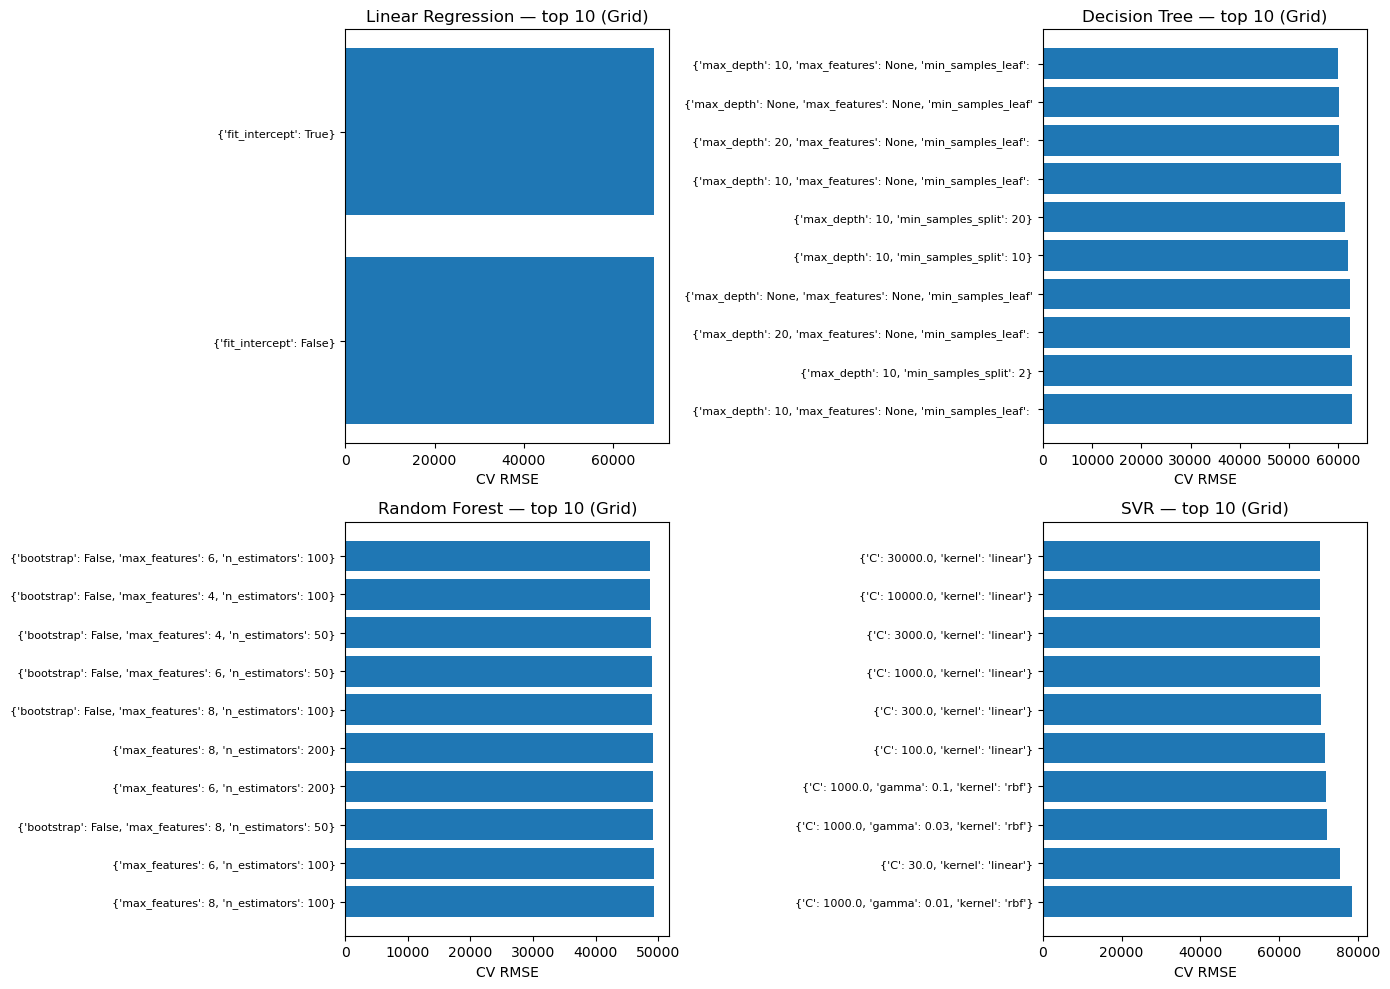

In [102]:
# Cell B — top 10 configs per model & boxplot of fold scores for the best config
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_top_configs(grid_search_obj, title, ax):
    df = pd.DataFrame(grid_search_obj.cv_results_)
    df['rmse'] = np.sqrt(-df['mean_test_score'])
    top = df.nsmallest(10, 'rmse')
    labels = [str(p) for p in top['params']]
    ax.barh(range(len(top)), top['rmse'][::-1])
    ax.set_yticks(range(len(top)))
    ax.set_yticklabels([l[:60] for l in labels[::-1]], fontsize=8)  # trim long strings
    ax.set_xlabel('CV RMSE')
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plot_top_configs(grid_search_lin, 'Linear Regression — top 10 (Grid)', axs[0,0])
plot_top_configs(grid_search_tree, 'Decision Tree — top 10 (Grid)', axs[0,1])
plot_top_configs(grid_search_forest, 'Random Forest — top 10 (Grid)', axs[1,0])
plot_top_configs(grid_search_svm, 'SVR — top 10 (Grid)', axs[1,1])
plt.tight_layout()
save_fig("top10_configs_each_model")
plt.show()



In [90]:
# Cell C — choose best model across all searches, evaluate on strat_test_set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

all_searches = [
    ('Linear - Grid', grid_search_lin),
    ('Linear - Random', rnd_search_lin),
    ('Tree - Grid', grid_search_tree),
    ('Tree - Random', rnd_search_tree),
    ('Forest - Grid', grid_search_forest),
    ('Forest - Random', rnd_search_forest),
    ('SVR - Grid', grid_search_svm),
    ('SVR - Random', rnd_search_svm),
]

best_name, best_search = None, None
best_rmse = np.inf
for name, s in all_searches:
    rmse = np.sqrt(-s.best_score_)
    if rmse < best_rmse:
        best_rmse = rmse
        best_name = name
        best_search = s

print("Best overall (by CV RMSE):", best_name)
print("Best CV RMSE:", best_rmse)
print("Best params:", best_search.best_params_)

# Evaluate on the held-out stratified test set (assumes strat_test_set exists)
final_model = best_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)   # pipeline from Chapter 2
final_preds = final_model.predict(X_test_prepared)

test_rmse = mean_squared_error(y_test, final_preds, squared=False)
test_mae = mean_absolute_error(y_test, final_preds)
test_r2 = r2_score(y_test, final_preds)

print("\nTest set performance (final model):")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Best overall (by CV RMSE): Forest - Random
Best CV RMSE: 48596.18493684165
Best params: {'bootstrap': False, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 162}

Test set performance (final model):
RMSE: 46382.46
MAE: 30667.36
R²: 0.8349


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


95% CI for RMSE: [44390.56, 48292.27]
Saving figure: .\images\pred_vs_actual_final.png


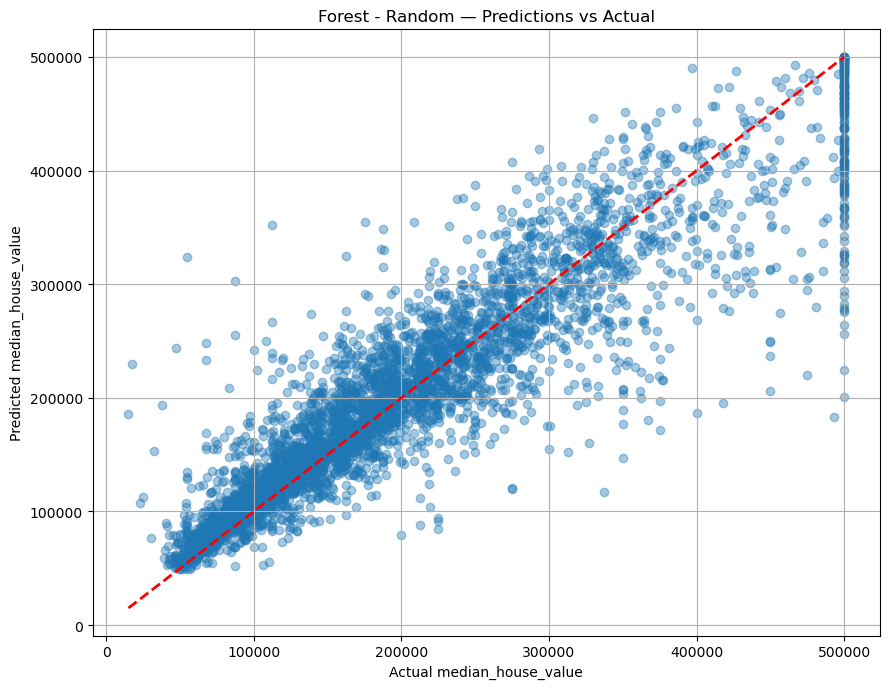

In [106]:
# Cell D — CI, predictions vs actual, residuals plots, error by price range, feature importances
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# 95% CI for RMSE (chapter method)
squared_errors = (final_preds - y_test) ** 2
confidence = 0.95
ci_low, ci_high = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                           loc=squared_errors.mean(),
                                           scale=stats.sem(squared_errors)))
print(f"95% CI for RMSE: [{ci_low:.2f}, {ci_high:.2f}]")

# Predictions vs Actual
plt.figure(figsize=(9,7))
plt.scatter(y_test, final_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title(f"{best_name} — Predictions vs Actual")
plt.grid(True)
save_fig("pred_vs_actual_final")
plt.show()


